### Part 1

Simple way to do an EDA ata preparation and changing the type of data, as well as using seaborn , matplotlib and yellowbrick for visualization.

In [38]:
import numpy as np
import pandas as pd

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
SuperStoreOrders = pd.read_csv('./Data/SuperStore_Orders - removed columns.csv', encoding="ISO-8859-1") 
df = SuperStoreOrders.copy()
df.head()

,Order_id,Order_date,Ship_date,Ship_mode,Customer_name,Segment,State,Country,Market,Region,...,Category,Sub_category,Product_name,Sales,Quantity,Discount,Profit,Shipping_cost,Order_priority,Year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
Profit,51290.0,28.641740,174.424113,-6599.978,0.00,9.24,36.81,8399.976
Shipping_cost,51290.0,26.375915,57.296804,0.000,2.61,7.79,24.45,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000


In [41]:
df.shape

(51290, 21)

In [42]:
#is there null or mask : df.isna().sum()[df.isna().sum()>0]
df.isna().sum()


Order_id          0
Order_date        0
Ship_date         0
Ship_mode         0
Customer_name     0
Segment           0
State             0
Country           0
Market            0
Region            0
Product_id        0
Category          0
Sub_category      0
Product_name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_cost     0
Order_priority    0
Year              0
dtype: int64

In [43]:
df.nunique()

Order_id          25035
Order_date         1430
Ship_date          1464
Ship_mode             4
Customer_name       795
Segment               3
State              1094
Country             147
Market                7
Region               13
Product_id        10292
Category              3
Sub_category         17
Product_name       3788
Sales              2246
Quantity             14
Discount             27
Profit            24575
Shipping_cost     10037
Order_priority        4
Year                  4
dtype: int64

### Data Cleaning

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_id        51290 non-null  object 
 1   Order_date      51290 non-null  object 
 2   Ship_date       51290 non-null  object 
 3   Ship_mode       51290 non-null  object 
 4   Customer_name   51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   State           51290 non-null  object 
 7   Country         51290 non-null  object 
 8   Market          51290 non-null  object 
 9   Region          51290 non-null  object 
 10  Product_id      51290 non-null  object 
 11  Category        51290 non-null  object 
 12  Sub_category    51290 non-null  object 
 13  Product_name    51290 non-null  object 
 14  Sales           51290 non-null  object 
 15  Quantity        51290 non-null  int64  
 16  Discount        51290 non-null  float64
 17  Profit          51290 non-null 

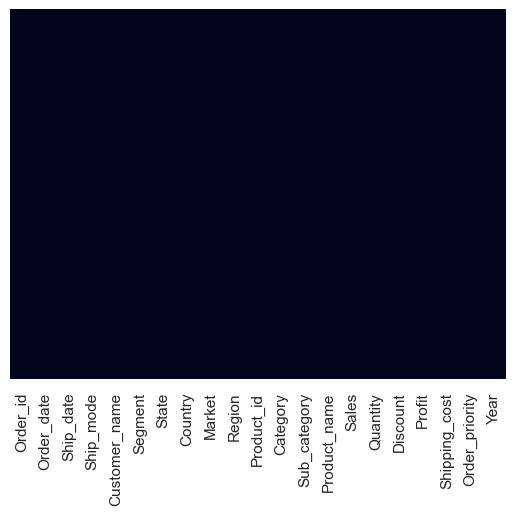

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

#no null in the data

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
Profit,51290.0,28.641740,174.424113,-6599.978,0.00,9.24,36.81,8399.976
Shipping_cost,51290.0,26.375915,57.296804,0.000,2.61,7.79,24.45,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000


## Top 5 Consumer Countries

In [47]:
# Number of Countries or use df['country'].count()
df['Country']

0              Algeria
1            Australia
2              Hungary
3               Sweden
4            Australia
             ...      
51285    United States
51286          Morocco
51287        Nicaragua
51288           Mexico
51289    United States
Name: Country, Length: 51290, dtype: object

In [48]:
df['Country'].value_counts()[0:5]

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
Name: Country, dtype: int64

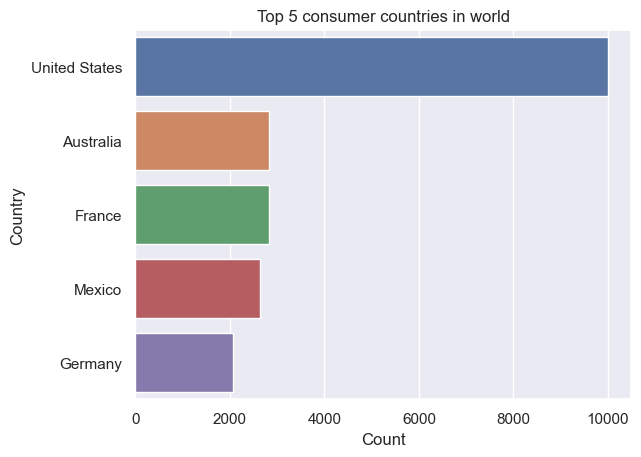

In [49]:
L1=["United States","Australia","France","Mexico","Germany"]
L2=[9994,2837,2827,2644,2065]
sns.barplot(x=L2,y=L1)
sns.set_theme(style="darkgrid")
plt.title("Top 5 consumer countries in world")
plt.xlabel('Count')
plt.ylabel('Country');

In [50]:
#US is the largest consumer in world
Store_US=df[df['Country']=='United States']
Store_Aus=df[df['Country']=='Australia']
Store_FR=df[df['Country']=='France']
Store_Mex=df[df['Country']=='Mexico']
Store_Ger=df[df['Country']=='Germany']

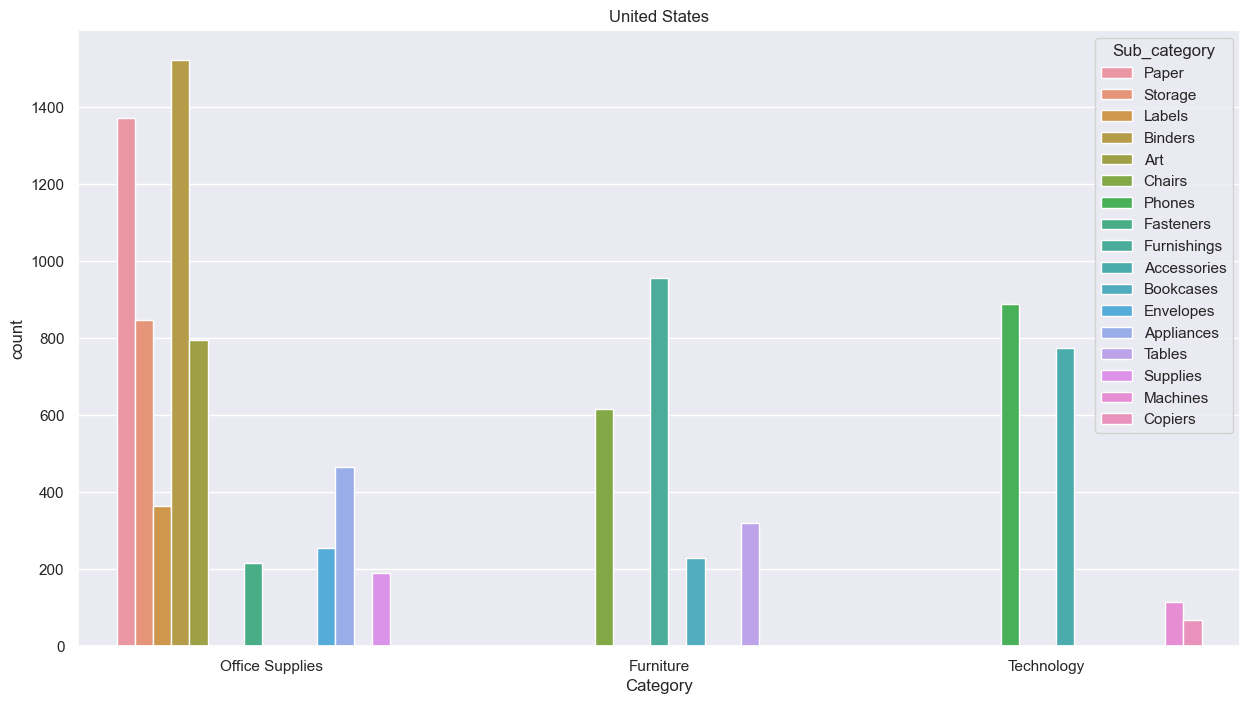

In [51]:
#Products by Categories consumed by Top 5 countries
plt.figure(figsize=(15,8))
plt.title('United States')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_US['Category'],hue=Store_US['Sub_category']);

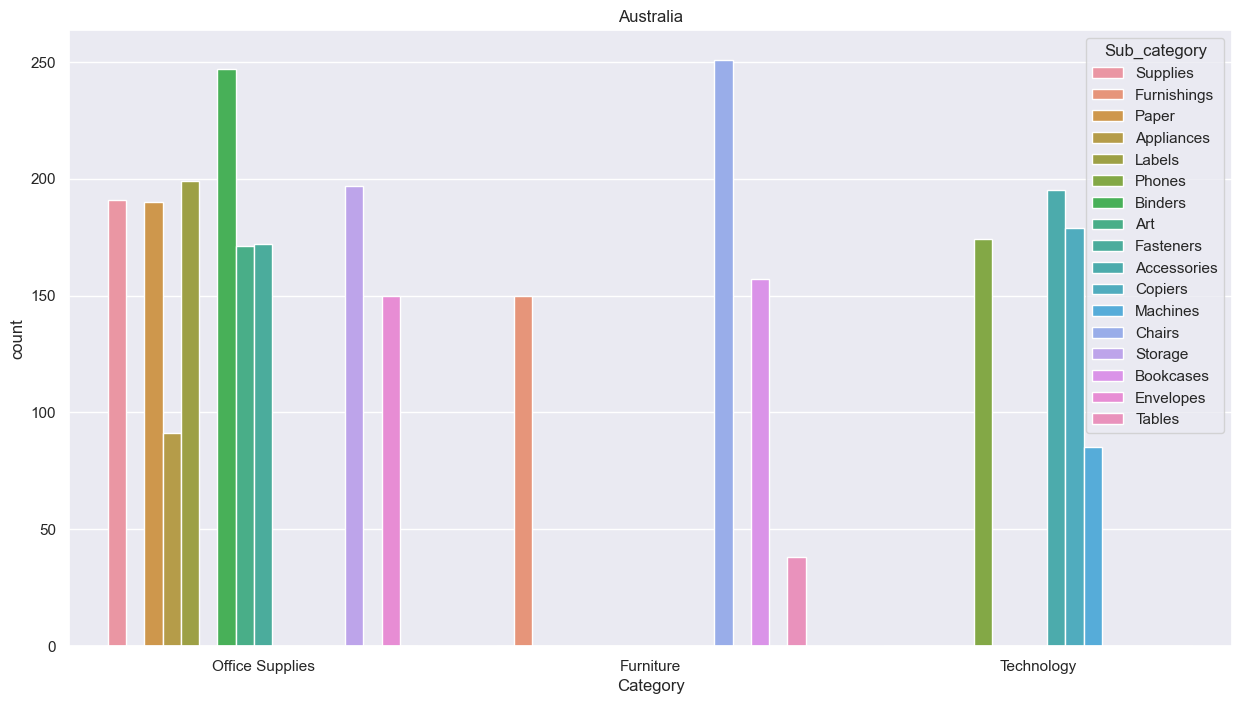

In [52]:
plt.figure(figsize=(15,8))
plt.title('Australia')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_Aus['Category'],hue=Store_Aus['Sub_category']);

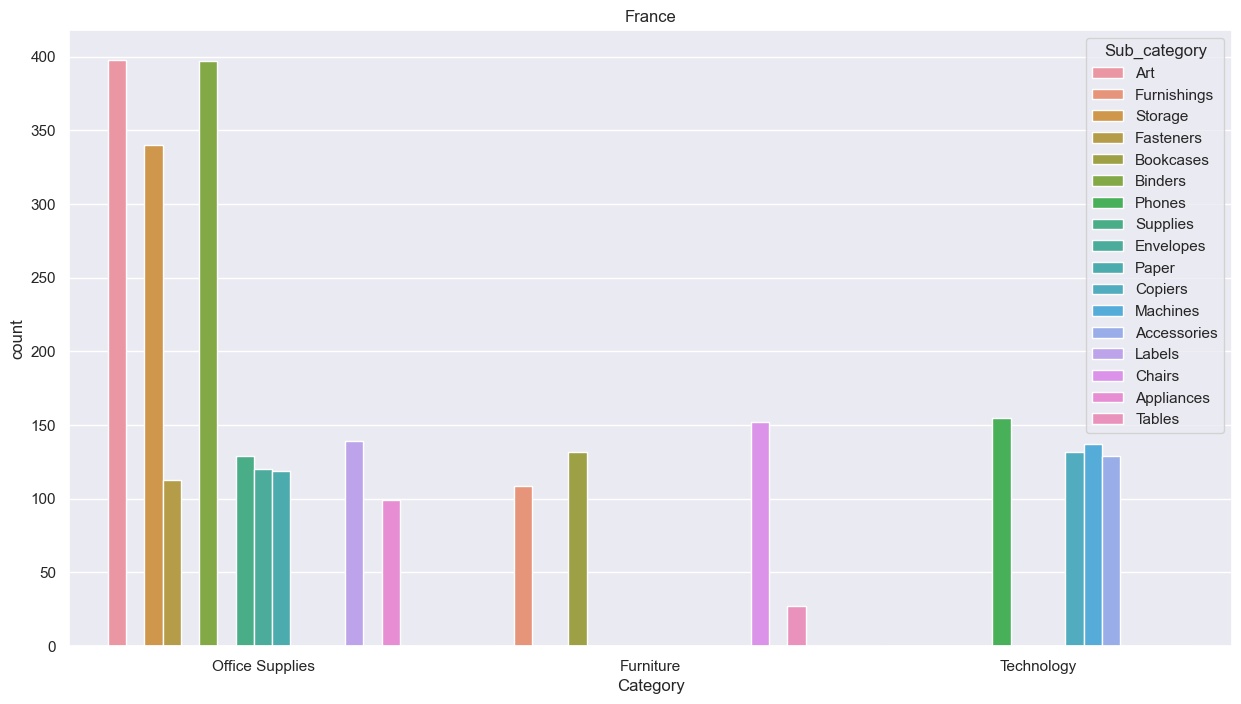

In [53]:
plt.figure(figsize=(15,8))
plt.title('France')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_FR['Category'],hue=Store_FR['Sub_category']);


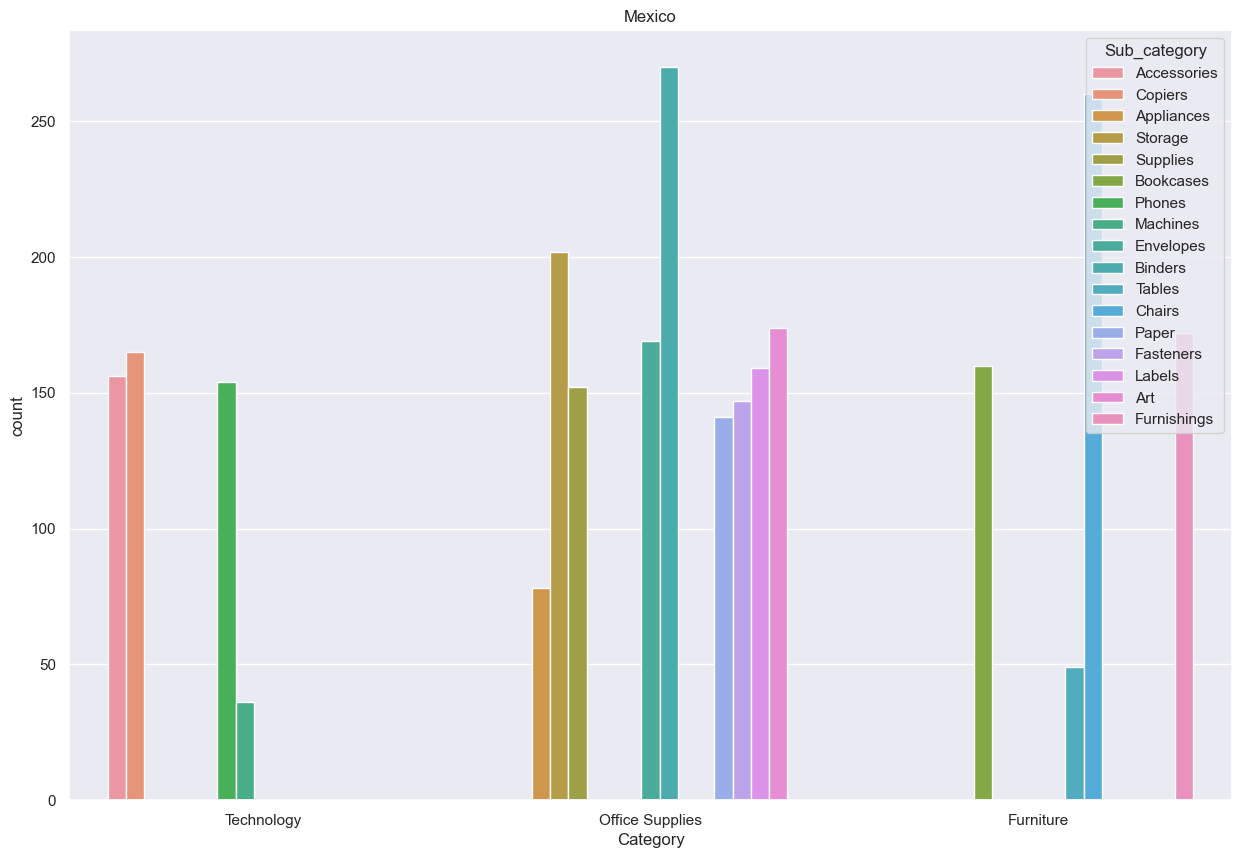

In [54]:
plt.figure(figsize=(15,10))
plt.title('Mexico')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_Mex['Category'],hue=Store_Mex['Sub_category']);

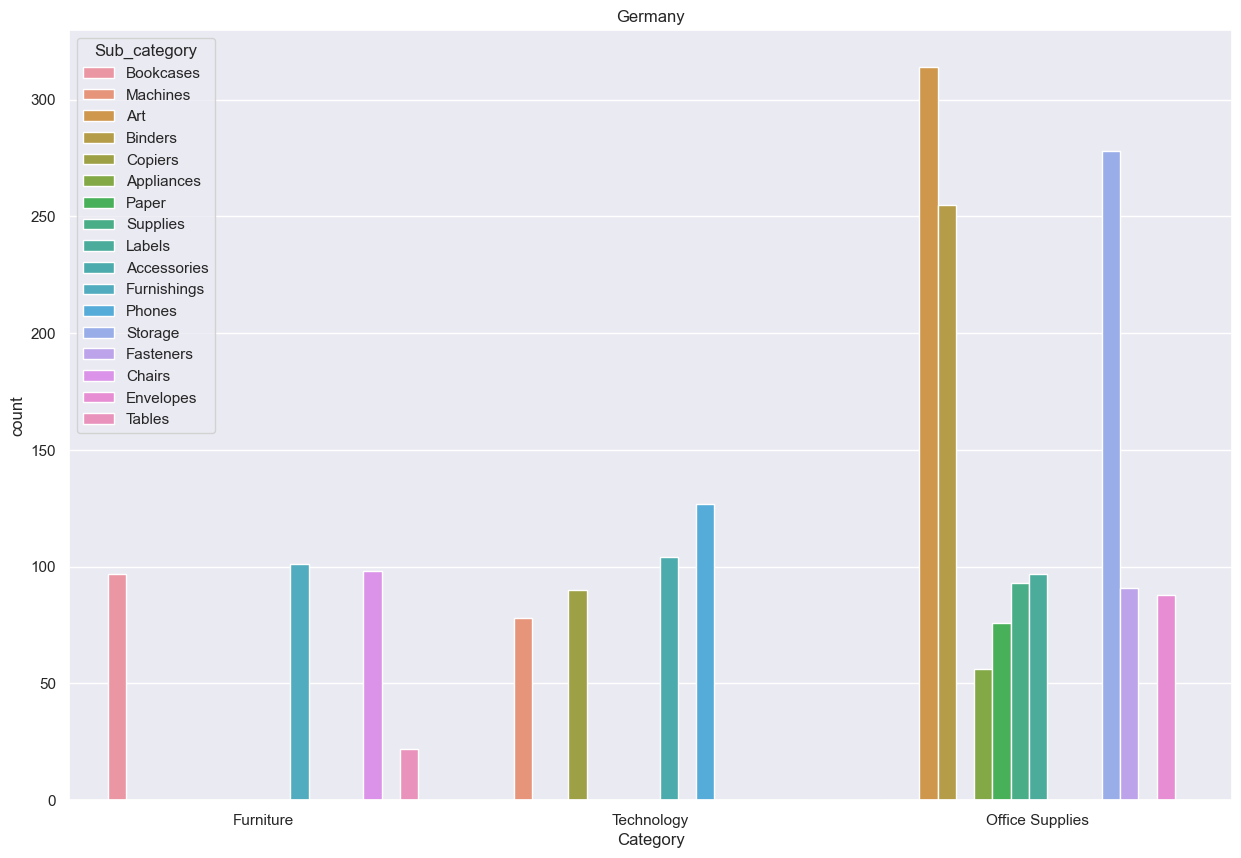

In [55]:
plt.figure(figsize=(15,10))
plt.title('Germany')
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Ger['Category'],hue=Store_Ger['Sub_category']);

### Market Segments

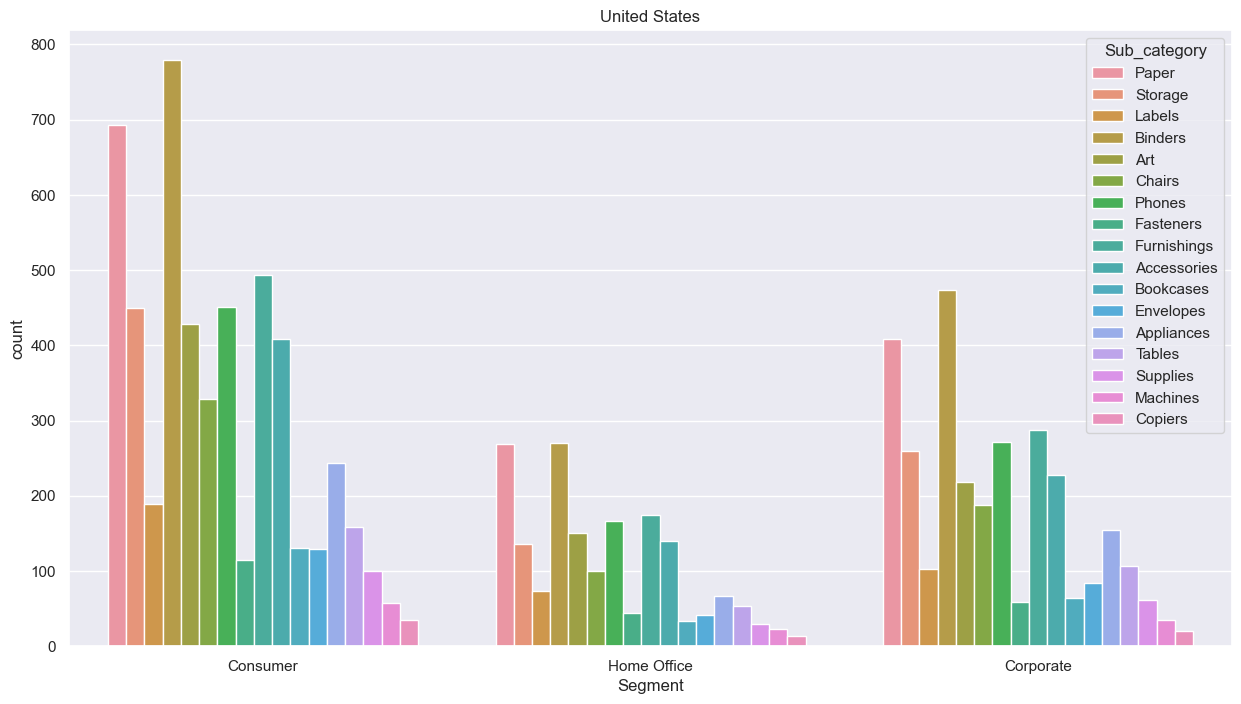

In [56]:
#Products by Categories consumed by Top 5 countries
plt.figure(figsize=(15,8))
plt.title('United States')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_US['Segment'],hue=Store_US['Sub_category']);

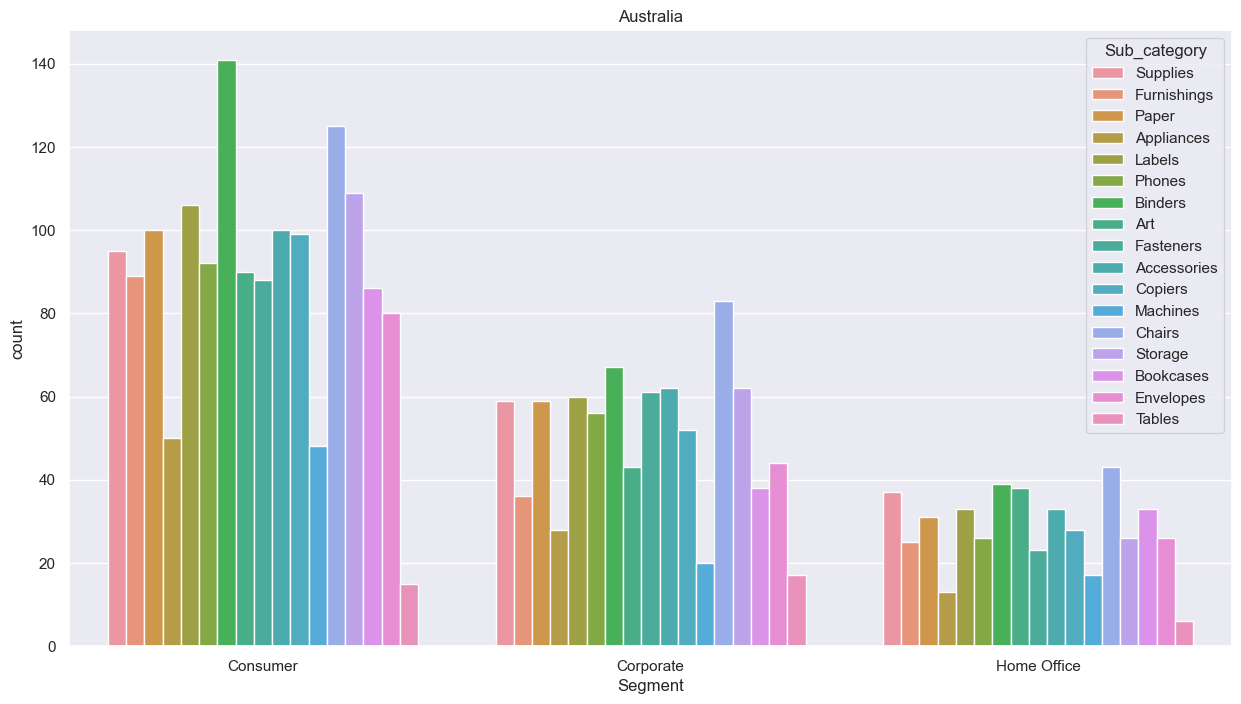

In [57]:
plt.figure(figsize=(15,8))
plt.title('Australia')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_Aus['Segment'],hue=Store_Aus['Sub_category']);

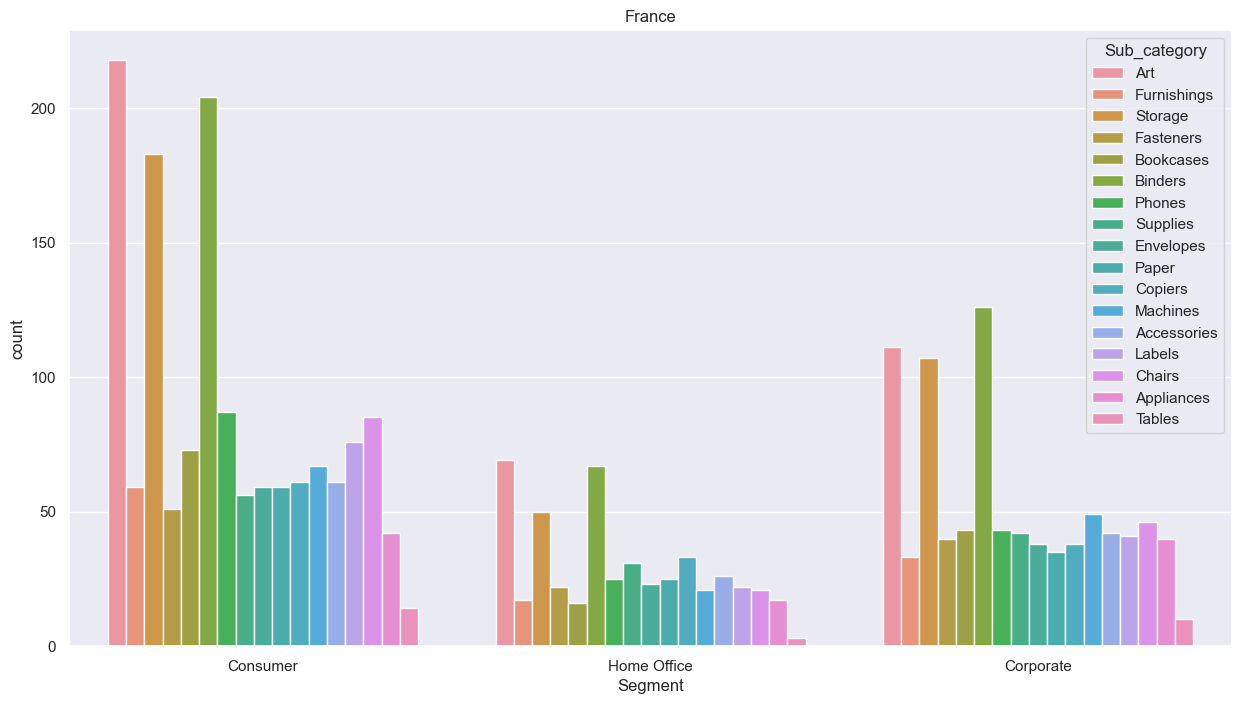

In [58]:
plt.figure(figsize=(15,8))
plt.title('France')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_FR['Segment'],hue=Store_FR['Sub_category']);

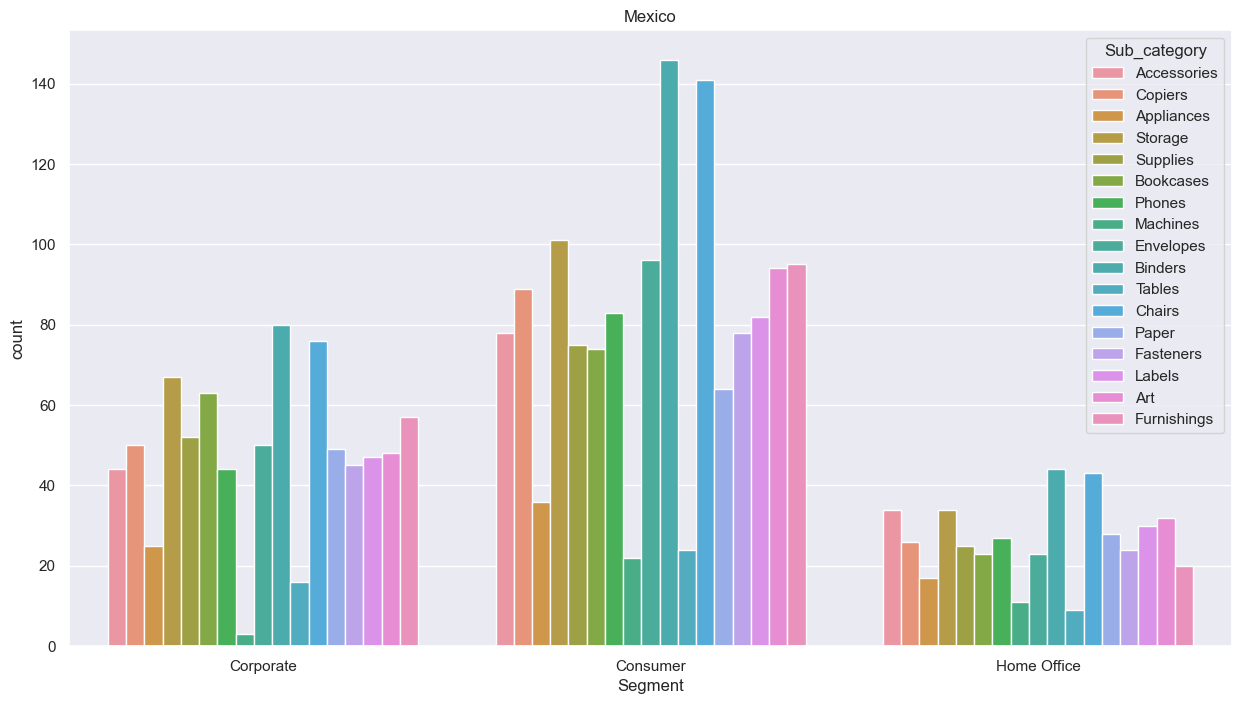

In [59]:
plt.figure(figsize=(15,8))
plt.title('Mexico')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_Mex['Segment'],hue=Store_Mex['Sub_category']);

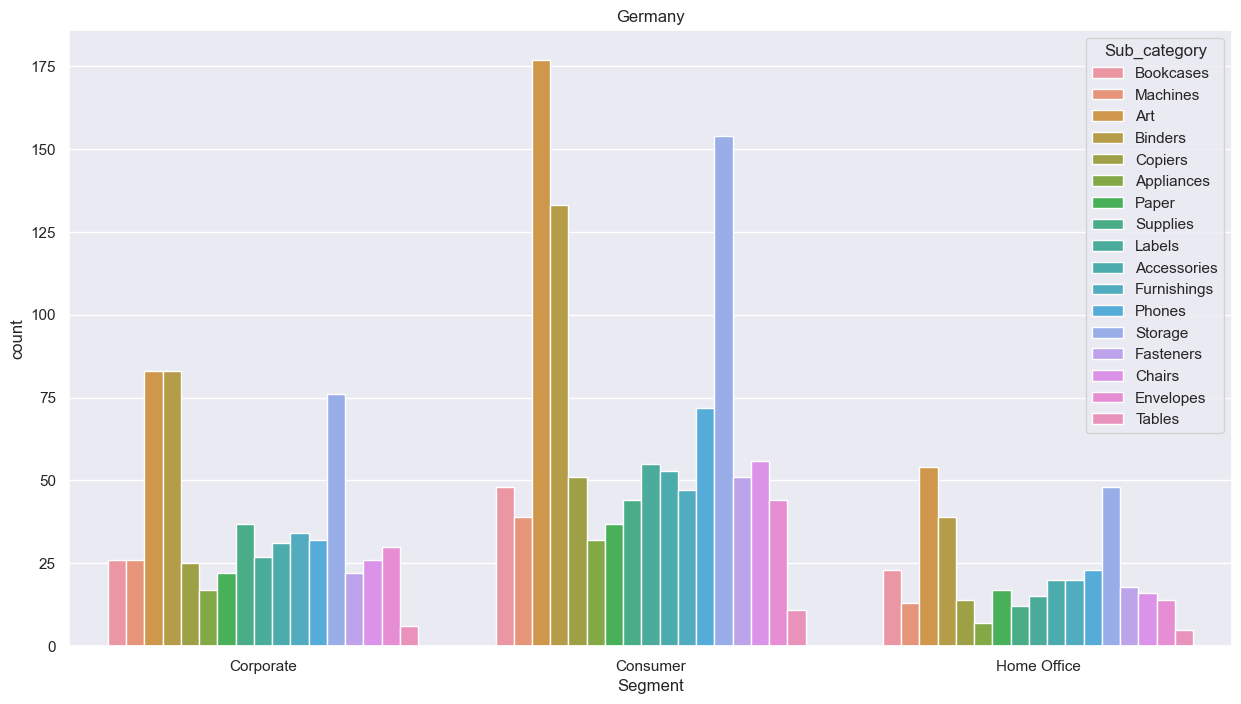

In [60]:
plt.figure(figsize=(15,8))
plt.title('Germany')
sns.set_theme(style='darkgrid')
sns.countplot(x=Store_Ger['Segment'],hue=Store_Ger['Sub_category']);

In [61]:
df['Year'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: Year, dtype: int64

In [62]:
df['Country'].nunique()

147

In [63]:
df['Product_name'].nunique()

3788

In [64]:
df['Product_name'].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Xerox Blank Computer Paper                                                     1
Panasonic KX MB2061 Multifunction Printer                                      1
Grip Seal Envelopes                                                            1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Acco Glide Clips                                                               1
Name: Product_name, Length: 3788, dtype: int64

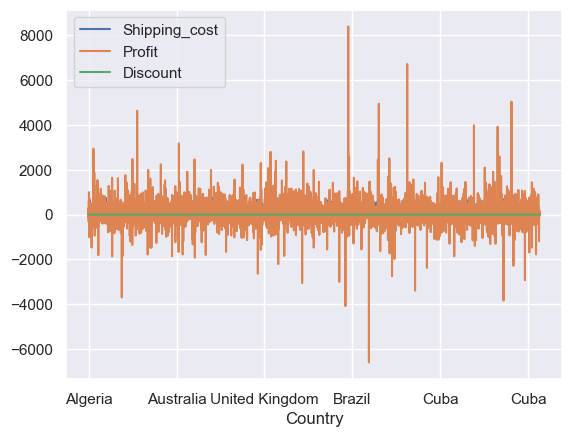

In [65]:
# Show Visualization using Matplotlib
# Showing other ways to present Numeric datas as shown below.
df.plot(x='Country', y=['Shipping_cost', 'Profit','Discount'])
plt.show()

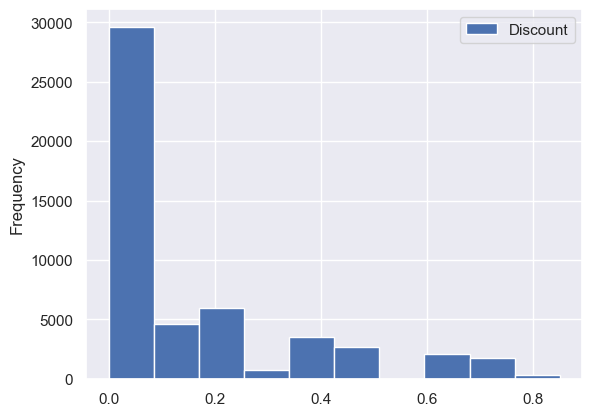

In [66]:
# Profit and discount

df.plot.hist(x='Profit', y=['Discount'])
plt.show()

In [67]:
profile = ProfileReport(df=df, title="Store Profile")

In [68]:
# profile.to_notebook_iframe()

profile.to_file("./Data/SuperStore_pen_pro.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]